# Deutsch Algorithm Implementation

The Deutsch algorithm determines whether a function f: {0,1} → {0,1} is constant or balanced using only one function evaluation.

- **Constant function**: f(0) = f(1) (both 0 or both 1)
- **Balanced function**: f(0) ≠ f(1) (one returns 0, the other returns 1)

In [27]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Define oracle functions for the Deutsch algorithm
def create_constant_oracle_0():
    """Create a constant oracle that always returns 0"""
    # For f(x) = 0, we don't need to do anything to the ancilla qubit
    oracle = QuantumCircuit(2)
    # No operations needed - the ancilla remains in |1⟩ state
    return oracle

def create_constant_oracle_1():
    """Create a constant oracle that always returns 1"""
    # For f(x) = 1, we flip the ancilla qubit for all inputs
    oracle = QuantumCircuit(2)
    oracle.x(1)  # Flip ancilla for both |0⟩ and |1⟩ inputs
    return oracle

def create_balanced_oracle_01():
    """Create a balanced oracle where f(0)=0, f(1)=1"""
    # Flip ancilla only when input is |1⟩
    oracle = QuantumCircuit(2)
    oracle.cx(0, 1)  # CNOT: flips ancilla when control qubit is |1⟩
    return oracle

def create_balanced_oracle_10():
    """Create a balanced oracle where f(0)=1, f(1)=0"""
    # Flip ancilla when input is |0⟩
    oracle = QuantumCircuit(2)
    oracle.x(0)     # Flip the input qubit
    oracle.cx(0, 1) # CNOT: flips ancilla when control qubit is |1⟩ 
    oracle.x(0)     # Flip back the input qubit
    return oracle

In [28]:
def deutsch_algorithm(oracle):
    """
    Implement the Deutsch algorithm with a given oracle
    
    Args:
        oracle: QuantumCircuit representing the oracle function
    
    Returns:
        QuantumCircuit: The complete Deutsch algorithm circuit
    """
    # Create circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Initialize qubits
    # Qubit 0 (input): |0⟩
    # Qubit 1 (ancilla): |1⟩ 
    qc.x(1)  # Put ancilla in |1⟩ state
    
    # Step 2: Apply Hadamard gates
    qc.h(0)  # Put input qubit in superposition
    qc.h(1)  # Put ancilla in |−⟩ = (|0⟩ - |1⟩)/√2 state
    
    # Step 3: Apply the oracle
    qc = qc.compose(oracle)
    
    # Step 4: Apply Hadamard to input qubit
    qc.h(0)
    
    # Step 5: Measure the input qubit
    qc.measure(0, 0)
    
    return qc

In [29]:
# Test all oracle types
oracles = {
    'Constant f(x)=0': create_constant_oracle_0(),
    'Constant f(x)=1': create_constant_oracle_1(),
    'Balanced f(0)=0, f(1)=1': create_balanced_oracle_01(),
    'Balanced f(0)=1, f(1)=0': create_balanced_oracle_10()
}

# Create and display circuits for each oracle
for name, oracle in oracles.items():
    print(f"\n{name}:")
    circuit = deutsch_algorithm(oracle)
    print(f"Oracle circuit:")
    print(oracle.draw())
    print(f"Complete Deutsch algorithm circuit:")
    print(circuit.draw())


Constant f(x)=0:
Oracle circuit:
     
q_0: 
     
q_1: 
     
Complete Deutsch algorithm circuit:
     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ H ├┤M├
     ├───┤├───┤└╥┘
q_1: ┤ X ├┤ H ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0 

Constant f(x)=1:
Oracle circuit:
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
Complete Deutsch algorithm circuit:
     ┌───┐┌───┐     ┌─┐
q_0: ┤ H ├┤ H ├─────┤M├
     ├───┤├───┤┌───┐└╥┘
q_1: ┤ X ├┤ H ├┤ X ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 

Balanced f(0)=0, f(1)=1:
Oracle circuit:
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Complete Deutsch algorithm circuit:
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 

Balanced f(0)=1, f(1)=0:
Oracle circuit:
     ┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └─

Complete Deutsch Algorithm Circuit:
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


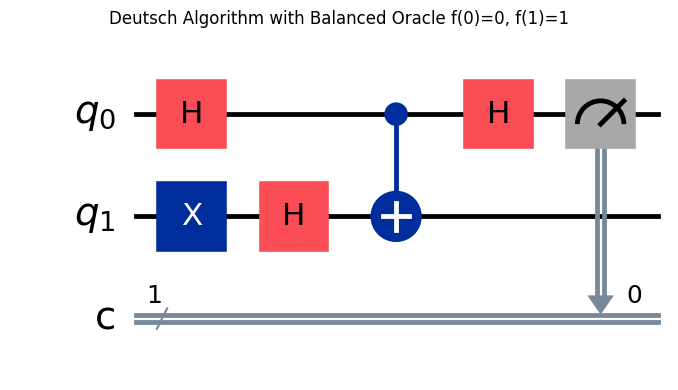

In [30]:
# Example: Using a balanced oracle in the Deutsch algorithm
oracle = create_balanced_oracle_01()  # f(0)=0, f(1)=1

# Create the complete circuit
qc = deutsch_algorithm(oracle)

print("Complete Deutsch Algorithm Circuit:")
print(qc.draw())

# Draw the circuit with matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
qc.draw(output='mpl', ax=ax)
plt.title('Deutsch Algorithm with Balanced Oracle f(0)=0, f(1)=1')
plt.tight_layout()
plt.show()

## How Oracle Functions Work in Deutsch Algorithm

### Oracle Types:

1. **Constant Oracles:**
   - `f(x) = 0`: Does nothing to the ancilla qubit
   - `f(x) = 1`: Applies X gate to ancilla qubit

2. **Balanced Oracles:**
   - `f(0)=0, f(1)=1`: Uses CNOT gate (flips ancilla when input is |1⟩)
   - `f(0)=1, f(1)=0`: Uses X-CNOT-X sequence (flips ancilla when input is |0⟩)

### Interpreting Results:
- **Measurement = 0**: Function is **constant**
- **Measurement = 1**: Function is **balanced**

The oracle encodes the function by conditionally flipping the ancilla qubit based on the input and the desired function behavior.

## Matrix-Based Oracle Implementation

Instead of using quantum gates, we can define oracles using unitary matrices that represent the transformation of the 2-qubit system.

In [31]:
# Matrix-based oracle implementations

def create_matrix_constant_oracle_0():
    """Create constant oracle f(x)=0 using matrix representation"""
    # Identity matrix - no change to any state
    oracle_matrix = np.array([
        [1, 0, 0, 0],  # |00⟩ → |00⟩
        [0, 1, 0, 0],  # |01⟩ → |01⟩
        [0, 0, 1, 0],  # |10⟩ → |10⟩
        [0, 0, 0, 1]   # |11⟩ → |11⟩
    ])
    
    oracle = QuantumCircuit(2)
    oracle.unitary(oracle_matrix, [0, 1], label='f(x)=0')
    return oracle

def create_matrix_constant_oracle_1():
    """Create constant oracle f(x)=1 using matrix representation"""
    # Flip ancilla qubit for all inputs
    oracle_matrix = np.array([
        [0, 1, 0, 0],  # |00⟩ → |01⟩
        [1, 0, 0, 0],  # |01⟩ → |00⟩
        [0, 0, 0, 1],  # |10⟩ → |11⟩
        [0, 0, 1, 0]   # |11⟩ → |10⟩
    ])
    
    oracle = QuantumCircuit(2)
    oracle.unitary(oracle_matrix, [0, 1], label='f(x)=1')
    return oracle

def create_matrix_balanced_oracle_01():
    """Create balanced oracle f(0)=0, f(1)=1 using matrix representation"""
    # Flip ancilla only when input qubit is |1⟩
    oracle_matrix = np.array([
        [1, 0, 0, 0],  # |00⟩ → |00⟩ (input=0, f(0)=0, no flip)
        [0, 1, 0, 0],  # |01⟩ → |01⟩ (input=0, f(0)=0, no flip)
        [0, 0, 0, 1],  # |10⟩ → |11⟩ (input=1, f(1)=1, flip ancilla)
        [0, 0, 1, 0]   # |11⟩ → |10⟩ (input=1, f(1)=1, flip ancilla)
    ])
    
    oracle = QuantumCircuit(2)
    oracle.unitary(oracle_matrix, [0, 1], label='f(0)=0,f(1)=1')
    return oracle

def create_matrix_balanced_oracle_10():
    """Create balanced oracle f(0)=1, f(1)=0 using matrix representation"""
    # Flip ancilla only when input qubit is |0⟩
    oracle_matrix = np.array([
        [0, 1, 0, 0],  # |00⟩ → |01⟩ (input=0, f(0)=1, flip ancilla)
        [1, 0, 0, 0],  # |01⟩ → |00⟩ (input=0, f(0)=1, flip ancilla)
        [0, 0, 1, 0],  # |10⟩ → |10⟩ (input=1, f(1)=0, no flip)
        [0, 0, 0, 1]   # |11⟩ → |11⟩ (input=1, f(1)=0, no flip)
    ])
    
    oracle = QuantumCircuit(2)
    oracle.unitary(oracle_matrix, [0, 1], label='f(0)=1,f(1)=0')
    return oracle

In [32]:
# Compare matrix-based vs circuit-based oracles
print("=== MATRIX-BASED ORACLES ===")

matrix_oracles = {
    'Matrix Constant f(x)=0': create_matrix_constant_oracle_0(),
    'Matrix Constant f(x)=1': create_matrix_constant_oracle_1(),
    'Matrix Balanced f(0)=0, f(1)=1': create_matrix_balanced_oracle_01(),
    'Matrix Balanced f(0)=1, f(1)=0': create_matrix_balanced_oracle_10()
}

for name, oracle in matrix_oracles.items():
    print(f"\n{name}:")
    circuit = deutsch_algorithm(oracle)
    print(f"Complete circuit:")
    print(circuit.draw())
    
print("\n" + "="*50)
print("Matrix oracles use the unitary gate to directly apply")
print("the transformation matrix to the qubits, while circuit")
print("oracles build the same transformation using elementary gates.")

=== MATRIX-BASED ORACLES ===

Matrix Constant f(x)=0:
Complete circuit:
     ┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├
     ├───┤┌───┐│  f(x)=0 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1        ├──────╫─
     └───┘└───┘└─────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 

Matrix Constant f(x)=1:
Complete circuit:
     ┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├
     ├───┤┌───┐│  f(x)=1 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1        ├──────╫─
     └───┘└───┘└─────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 

Matrix Balanced f(0)=0, f(1)=1:
Complete circuit:
     ┌───┐     ┌────────────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0               ├┤ H ├┤M├
     ├───┤┌───┐│  f(0)=0,f(1)=1 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1               ├──────╫─
     └───┘└───┘└────────────────┘      ║ 
c: 1/══════════════════════════════════╩═
                                       0 

Matrix Balanced f(0)=1, f(1)=0:
Complete circuit:

### Understanding the Matrix Representation

Each 4×4 matrix represents how the oracle transforms the 2-qubit basis states:
- **Rows/Columns order**: |00⟩, |01⟩, |10⟩, |11⟩
- **First qubit**: Input qubit (0 or 1)  
- **Second qubit**: Ancilla qubit (initially in |1⟩ state)

**How the oracle works:**
1. The oracle receives the input in superposition: (|0⟩ + |1⟩)/√2 ⊗ |1⟩
2. It applies the function f(x) by conditionally flipping the ancilla
3. The result encodes whether f is constant or balanced

**Matrix elements explanation:**
- Each matrix element `M[i,j]` represents the amplitude for transitioning from state `j` to state `i`
- For oracle functions, these are always 0 or 1 (deterministic transformations)
- The matrices must be unitary (reversible transformations)

In [ ]:
# Example: Create your own oracle matrix
print("Creating a custom oracle matrix...")

# Let's create a balanced oracle where f(0)=0, f(1)=1 (same as CNOT)
my_oracle_matrix = np.array([
    [1, 0, 0, 0],  # |00⟩ stays |00⟩
    [0, 1, 0, 0],  # |01⟩ stays |01⟩  
    [0, 0, 0, 1],  # |10⟩ becomes |11⟩
    [0, 0, 1, 0]   # |11⟩ becomes |10⟩
])

print("Oracle matrix:")
print(my_oracle_matrix)

# Verify it's unitary (unitary matrices satisfy: U† * U = I)
print(f"\nIs unitary? {np.allclose(my_oracle_matrix @ my_oracle_matrix.T, np.eye(4))}")

# Create circuit with this matrix
oracle_circuit = QuantumCircuit(2)
oracle_circuit.unitary(my_oracle_matrix, [0, 1], label='Custom Oracle')

# Test it in the Deutsch algorithm
result_circuit = deutsch_algorithm(oracle_circuit)
print(f"\nDeutsch algorithm with custom matrix oracle:")
result_circuit.draw("mpl")

Creating a custom oracle matrix...
Oracle matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]

Is unitary? True

Deutsch algorithm with custom matrix oracle:
Figure(705.35x284.278)


## Matrix vs Circuit Approaches: Pros & Cons

### **Matrix-Based Oracles** (`circuit.unitary(matrix, qubits)`)
**Advantages:**
- ✅ Direct mathematical specification of the transformation
- ✅ Easy to verify properties (unitarity, determinant, etc.)
- ✅ Can represent any unitary operation exactly
- ✅ Good for theoretical analysis and custom transformations

**Disadvantages:**
- ❌ Less intuitive for understanding the quantum operations
- ❌ Harder to optimize for real quantum hardware
- ❌ Matrix size grows exponentially with qubit count (2ⁿ × 2ⁿ)
- ❌ May not decompose efficiently into native gate sets

### **Circuit-Based Oracles** (using `H`, `X`, `CNOT`, etc.)
**Advantages:**
- ✅ More intuitive understanding of quantum operations
- ✅ Better optimization for quantum hardware
- ✅ Efficient representation (scales linearly with gates)
- ✅ Easy to decompose into hardware-native gates

**Disadvantages:**
- ❌ May require more complex gate sequences for some operations
- ❌ Need to design the circuit to achieve desired transformation
- ❌ Less direct mathematical control

### **When to use each:**
- **Matrix approach**: Theoretical work, custom transformations, small systems
- **Circuit approach**: Hardware implementation, larger systems, educational purposes